In [59]:
#Importing modules
from pyecg import ECGRecord
import matplotlib.pyplot as plt
import scipy.signal
from scipy.signal import butter, lfilter, freqz
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

## Reading ECG Data

In [2]:
file_path=r"C:\\Users\\nachowdh\\OneDrive - Capgemini\\Desktop\\COMP5703\\CS52-2_Final_Submission\s0010_re.dat"

In [3]:
record = ECGRecord.from_wfdb(file_path)
record

Record s0010_re: ['i', 'ii', 'iii', 'avr', 'avl', 'avf', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'vx', 'vy', 'vz']

In [4]:
time = record.time
i = record.get_lead('i')
len(i)

38400

In [5]:
leads=['i', 'ii', 'iii', 'avr', 'avl', 'avf', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'vx', 'vy', 'vz']

In [8]:
#Getting each lead signal
i=record.get_lead('i')
ii=record.get_lead('ii')
iii=record.get_lead('iii')
avr=record.get_lead('avr')
avl=record.get_lead('avl')
avf=record.get_lead('avf')
v1=record.get_lead('v1')
v2=record.get_lead('v2')
v3=record.get_lead('v3')
v4=record.get_lead('v4') 
v5=record.get_lead('v5')
v6=record.get_lead('v6')
vx=record.get_lead('vx')
vy=record.get_lead('vy')
vz=record.get_lead('vz')


In [11]:
time_axis=list(time)

In [9]:
v2

[-0.1205,
 -0.1175,
 -0.118,
 -0.1175,
 -0.117,
 -0.121,
 -0.1215,
 -0.1175,
 -0.118,
 -0.1205,
 -0.123,
 -0.122,
 -0.1195,
 -0.1205,
 -0.119,
 -0.119,
 -0.1225,
 -0.1215,
 -0.1195,
 -0.1195,
 -0.1205,
 -0.119,
 -0.1195,
 -0.1195,
 -0.12,
 -0.121,
 -0.1195,
 -0.1185,
 -0.1125,
 -0.1105,
 -0.108,
 -0.1055,
 -0.113,
 -0.114,
 -0.1115,
 -0.107,
 -0.103,
 -0.1095,
 -0.1105,
 -0.1075,
 -0.1075,
 -0.1095,
 -0.104,
 -0.1025,
 -0.1075,
 -0.1085,
 -0.113,
 -0.1065,
 -0.104,
 -0.1115,
 -0.1085,
 -0.106,
 -0.105,
 -0.102,
 -0.1035,
 -0.1035,
 -0.1,
 -0.0985,
 -0.1005,
 -0.1005,
 -0.096,
 -0.0905,
 -0.0885,
 -0.095,
 -0.0955,
 -0.09,
 -0.0885,
 -0.087,
 -0.083,
 -0.079,
 -0.0815,
 -0.0775,
 -0.0665,
 -0.0725,
 -0.0795,
 -0.0745,
 -0.07,
 -0.071,
 -0.07,
 -0.07,
 -0.067,
 -0.06,
 -0.0575,
 -0.0545,
 -0.051,
 -0.0445,
 -0.041,
 -0.033,
 -0.0335,
 -0.041,
 -0.032,
 -0.021,
 -0.0055,
 -0.005,
 -0.0135,
 -0.0105,
 -0.0035,
 0.0095,
 0.0155,
 0.015,
 0.0165,
 0.024,
 0.0325,
 0.0355,
 0.0405,
 0.039,
 0

## Visualization

Text(0.5, 1.0, 'Lead i')

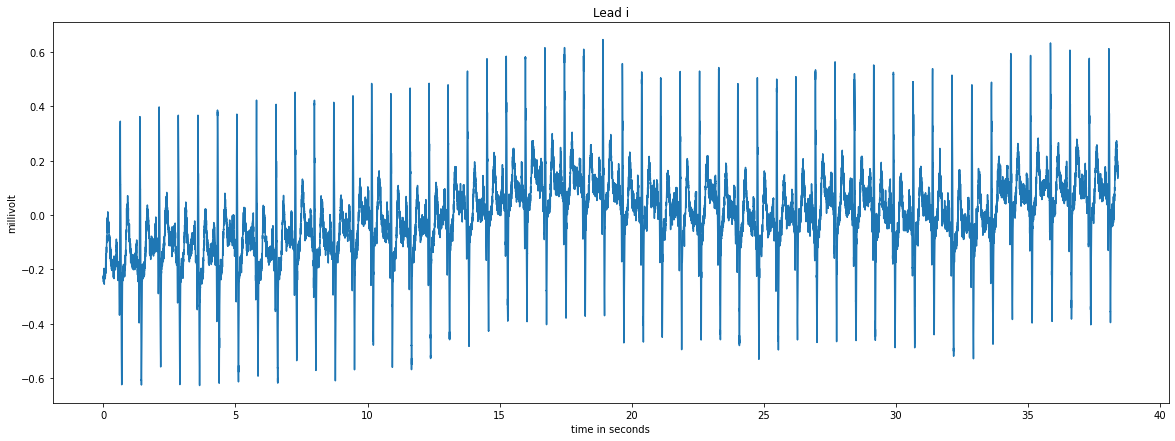

In [60]:
#Lead i
plt.figure(figsize=(20,7))
plt.plot(time_axis, i)
plt.xlabel('time in seconds')
plt.ylabel('millivolt')
plt.title('Lead i')

Text(0.5, 1.0, 'Lead v1')

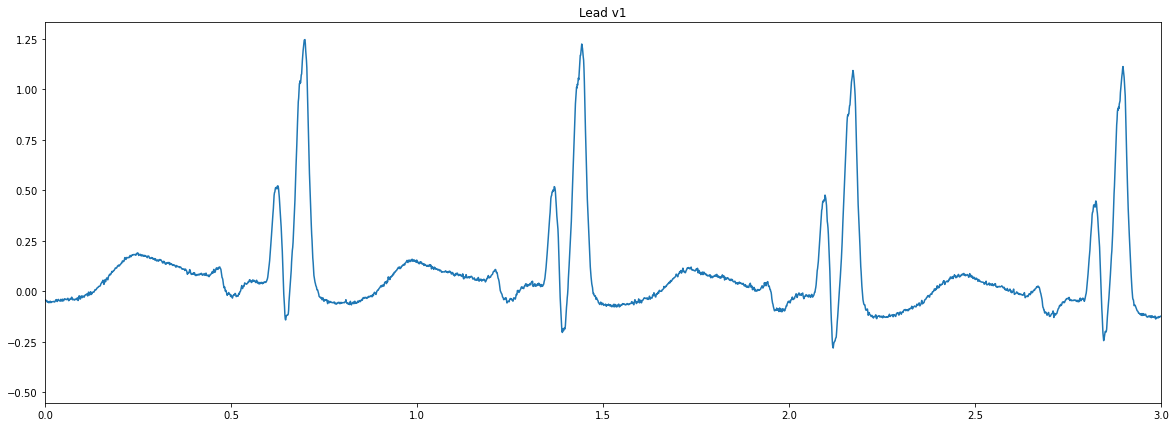

In [61]:
# Lead v1
plt.figure(figsize=(20,7))
plt.plot(time_axis, v1)
plt.xlim(0,3)
plt.title('Lead v1')

Text(0.5, 1.0, 'Lead v2')

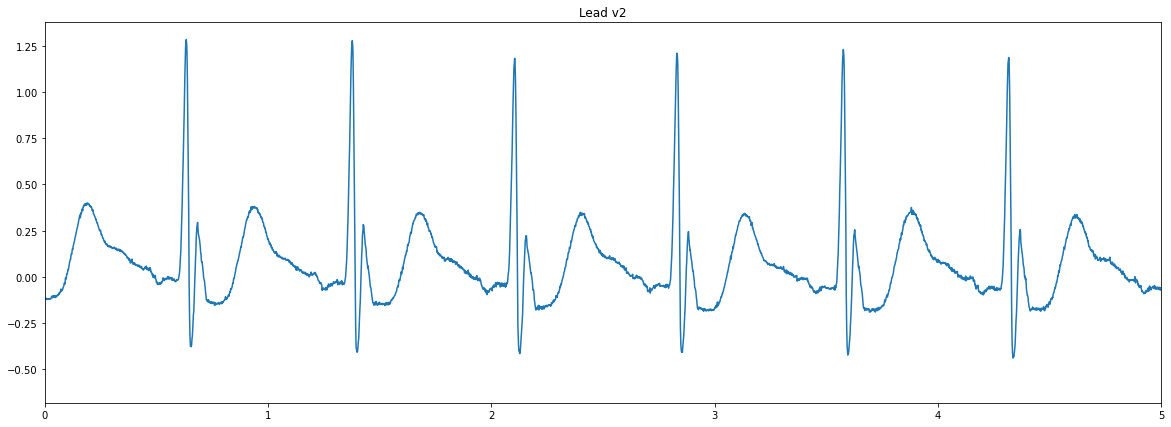

In [62]:
#Lead v2
plt.figure(figsize=(20,7))
plt.plot(time_axis, v2)
plt.xlim(0,5)
plt.title('Lead v2')

Text(0.5, 1.0, 'AVF')

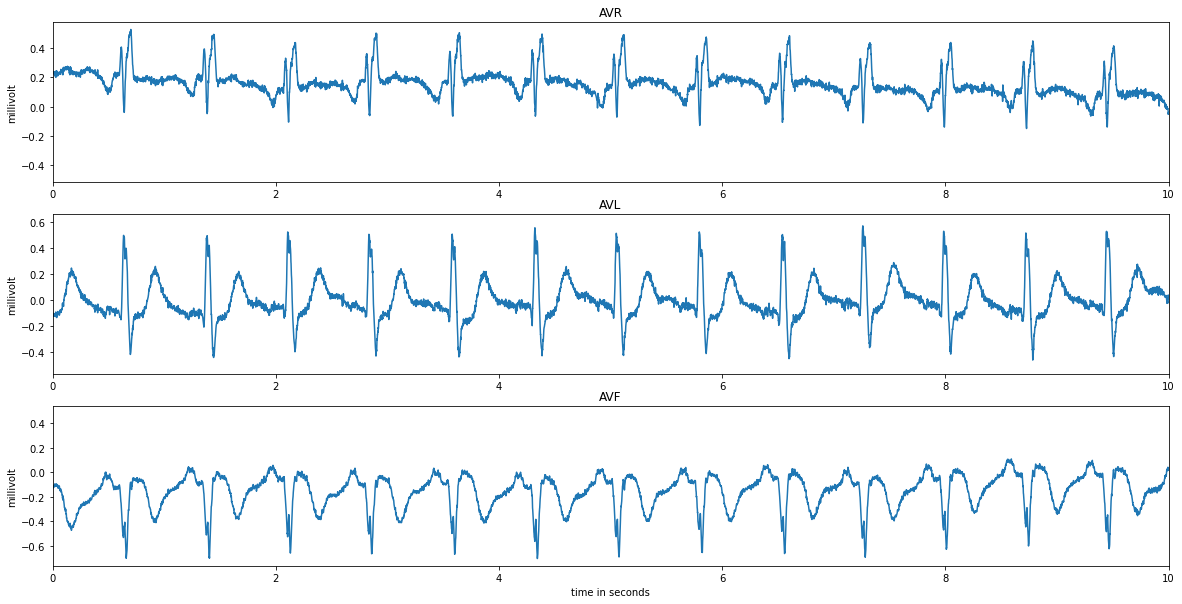

In [63]:
# AVR, AVF, AVL
plt.figure(figsize=(20,10))
plt.subplot(311)
plt.plot(time_axis, avr)
plt.xlim(0,10)
plt.ylabel('millivolt')
plt.title('AVR')

plt.subplot(312) # creates 2nd subplot with yellow background
plt.plot(time_axis, avl)
plt.xlim(0,10)
plt.ylabel('millivolt')
plt.title('AVL')

plt.subplot(313) # creates 2nd subplot with yellow background
plt.plot(time_axis, avf)
plt.xlabel('time in seconds')
plt.xlim(0,10)
plt.ylabel('millivolt')
plt.title('AVF')


## Filter

In [64]:
import scipy.signal
import numpy as np
from scipy.signal import butter, lfilter, freqz

# apply a 5-order Bandpass filter at 1000 sampling  frequency on AVR with lower cutoff frequency 1 Hz and 
#higher cutoff frequency 150 Hz
b, a = scipy.signal.butter(5, [1,150], btype='bandpass', analog=False, output='ba', fs=1000)
filtered = scipy.signal.filtfilt(b, a, avr)

Text(0.5, 1.0, 'AVR unfiltered')

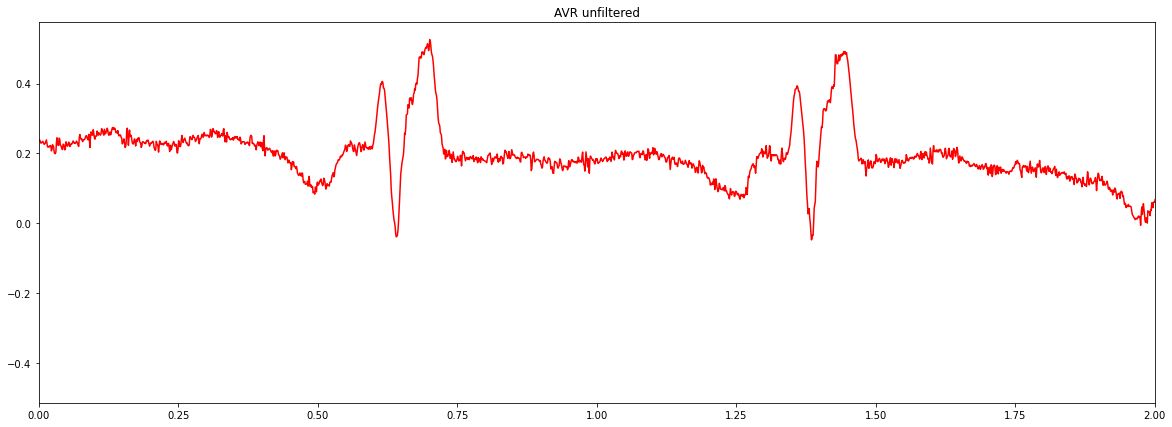

In [65]:
#AVR unfiltered
plt.figure(figsize=(20,7))
plt.xlim(0,2)
plt.plot(time_axis, avr,'r')
plt.title('AVR unfiltered')

Text(0.5, 1.0, 'AVR filtered at high cutoff frequency 150 Hz')

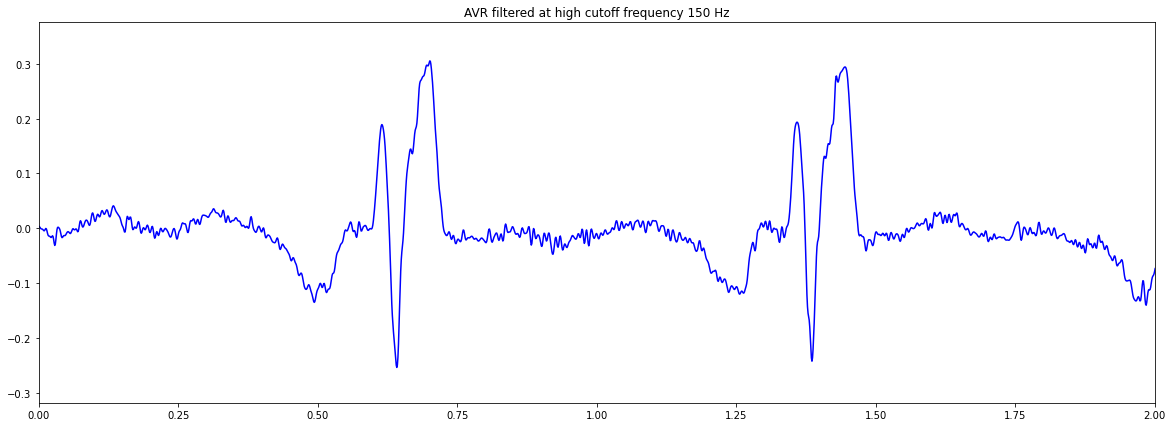

In [66]:
# AVR filtered at higher cutoff frequency 150Hz
plt.figure(figsize=(20,7))
plt.xlim(0,2)
plt.plot(time_axis, filtered,'b')
plt.title('AVR filtered at high cutoff frequency 150 Hz')

From above plot it's evident that  higher frequency noises remain in the signal. So, we try by lowering higher frequency range to 90 Hz. Since standard ECG frequency range is limited to 0.05-150 Hz, lower cutoff frequency is made 0.5 Hz to minimize potential information loss.

Text(0.5, 1.0, 'AVR filtered at high cutoff frequency 90 Hz')

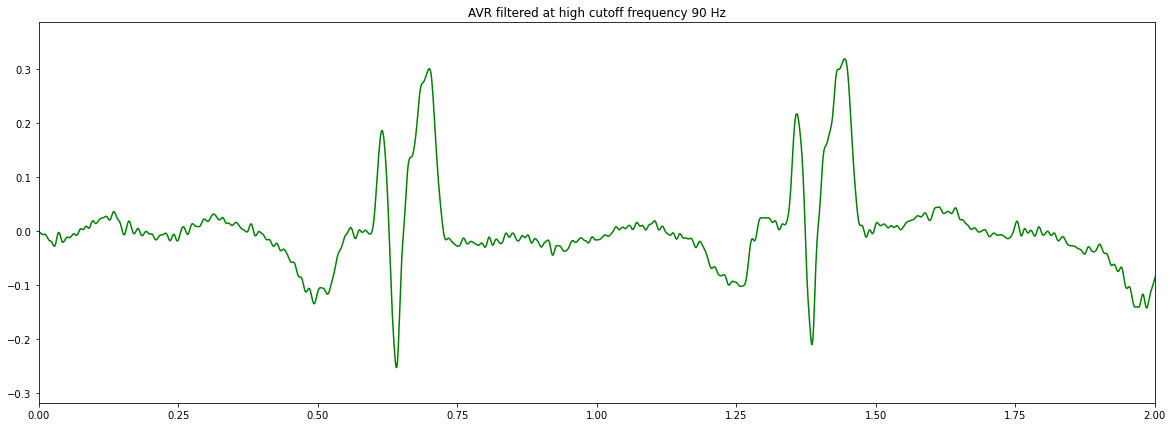

In [67]:
# AVR filtered at higher cutoff frequency 90Hz, lower cutoff frequency 0.5 Hz
b, a = scipy.signal.butter(5, [0.5,90], btype='bandpass', analog=False, output='ba', fs=1000)
filtered = scipy.signal.filtfilt(b, a, avr)
plt.figure(figsize=(20,7))
plt.xlim(0,2)
plt.plot(time_axis, filtered,'g')
plt.title('AVR filtered at high cutoff frequency 90 Hz')

Text(0.5, 1.0, 'v6 unfiltered')

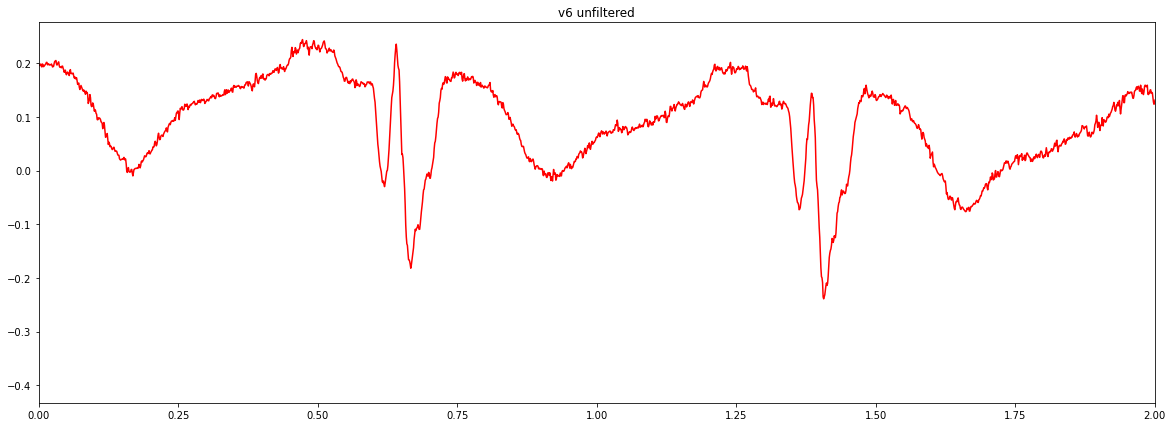

In [68]:
#v6 unfiltered
plt.figure(figsize=(20,7))
plt.xlim(0,2)
plt.plot(time_axis, v6,'r')
plt.title('v6 unfiltered')

Text(0.5, 1.0, 'v6 filtered at high cutoff frequency 90 Hz')

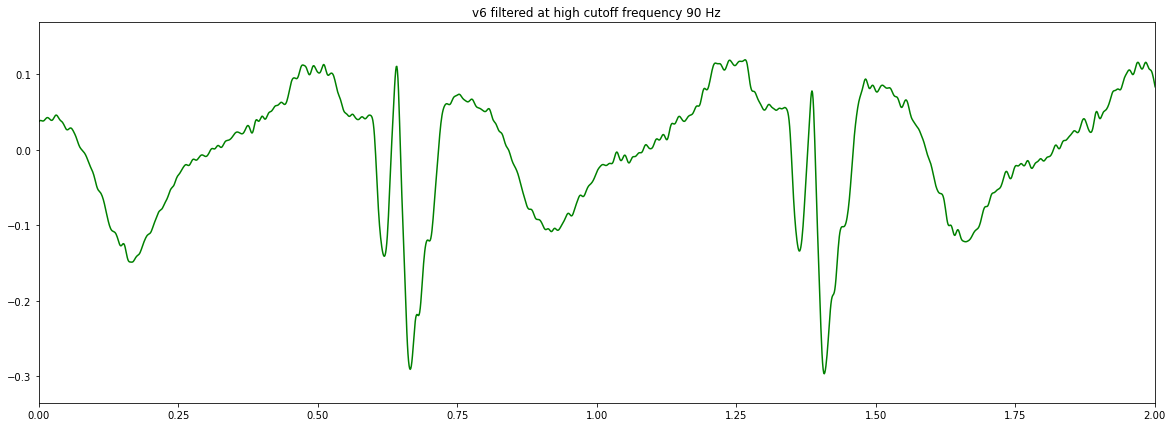

In [69]:
# v6 filtered at higher cutoff frequency 90Hz, lower cutoff frequency 0.5 Hz
b, a = scipy.signal.butter(5, [0.5,90], btype='bandpass', analog=False, output='ba', fs=1000)
filtered = scipy.signal.filtfilt(b, a, v6)
plt.figure(figsize=(20,7))
plt.xlim(0,2)
plt.plot(time_axis, filtered,'g')
plt.title('v6 filtered at high cutoff frequency 90 Hz')

## User defined function

In [70]:
#Getting all .dat file name in a list
import os

directory = r'C:\Users\nachowdh\OneDrive - Capgemini\Desktop\COMP5703\COMP5703_WK_07\Com'
all_patients=[]
for filename in os.scandir(directory):
        
        
        if filename.is_file():
            if filename.path.endswith('.dat'):
                all_patients.append(filename.name)

In [71]:
all_patients

['s0010_re.dat',
 's0020bre.dat',
 's0021bre.dat',
 's0027lre.dat',
 's0029lre.dat',
 's0037lre.dat',
 's0042lre.dat',
 's0044lre.dat',
 's0050lre.dat',
 's0051lre.dat',
 's0055lre.dat',
 's0056lre.dat',
 's0057lre.dat',
 's0059lre.dat',
 's0060lre.dat',
 's0069lre.dat',
 's0070lre.dat',
 's0073lre.dat',
 's0074lre.dat',
 's0081lre.dat',
 's0084lre.dat',
 's0091lre.dat',
 's0093lre.dat',
 's0095lre.dat',
 's0096lre.dat',
 's0098lre.dat',
 's0104lre.dat',
 's0106lre.dat',
 's0113lre.dat',
 's0116lre.dat',
 's0117lre.dat',
 's0118lre.dat',
 's0119lre.dat',
 's0120lre.dat',
 's0128lre.dat',
 's0131lre.dat',
 's0134lre.dat',
 's0136lre.dat',
 's0137lre.dat',
 's0143lre.dat',
 's0144lre.dat',
 's0148lre.dat',
 's0161lre.dat',
 's0163lre.dat',
 's0172lre.dat',
 's0177lre.dat',
 's0178lre.dat',
 's0179lre.dat',
 's0190lre.dat',
 's0191lre.dat',
 's0192lre.dat',
 's0196lre.dat',
 's0198lre.dat',
 's0208lre.dat',
 's0209lre.dat',
 's0210lre.dat',
 's0212lre.dat',
 's0214lre.dat',
 's0216lre.dat

In [72]:
len(all_patients)

100

In [73]:
def preparation (datasize,freq_range,train_leads,seed):
    
        
        patients=all_patients[:datasize] #ECG records to be considered for this project
        patients_array=np.array(patients)
        patients_train ,patients_test = train_test_split(patients_array,test_size=0.2,random_state=seed) # Splitting the records
        #into train and test set
        
        leads=['i', 'ii', 'iii', 'avr', 'avl', 'avf', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'vx', 'vy', 'vz'] #Lead names in a list
        predict_leads=list(set(leads).difference(set(train_leads))) #Leads to be predicted
        
        b, a = scipy.signal.butter(5, freq_range, btype='bandpass', analog=False, output='ba', fs=1000) # Butterworth bandpass filter
        #for noise filtering
        
        train=pd.DataFrame()

        for patient in patients_train:
        
        
                file_path=directory+'/'+patient
                patient_data=ECGRecord.from_wfdb(file_path)
                time_index=list(patient_data.time)
                patient_by_lead=[time_index]
                
                for lead in leads:
                    lead_data=patient_data.get_lead(lead)
                    
                    filtered=scipy.signal.filtfilt(b, a, lead_data)
                    patient_by_lead.append(filtered)
                
                #print(len(patient_by_lead))
                patient_df=pd.DataFrame(patient_by_lead)
                patient_transposed=patient_df.transpose()
                patient_transposed.columns=['time','i', 'ii', 'iii', 'avr', 'avl', 'avf', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'vx', 'vy', 'vz']
                
                if patient_transposed.shape[0]>30000:
                    patient_transposed=patient_transposed[:30000] #considering only 30 seconds data
                train=train.append(patient_transposed)
                x_train=train[train_leads]
                y_train=train[predict_leads]
                
        test=pd.DataFrame()

        for patient in patients_test:
        
        
                file_path=directory+'/'+patient
                patient_data=ECGRecord.from_wfdb(file_path)
                time_index=list(patient_data.time)
                patient_by_lead=[time_index]
                
                for lead in leads:
                    lead_data=patient_data.get_lead(lead)
                    
                    filtered=scipy.signal.filtfilt(b, a, lead_data)
                    patient_by_lead.append(filtered)
                
                #print(len(patient_by_lead))
                patient_df=pd.DataFrame(patient_by_lead)
                patient_transposed=patient_df.transpose()
                patient_transposed.columns=['time','i', 'ii', 'iii', 'avr', 'avl', 'avf', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'vx', 'vy', 'vz']
                
                if patient_transposed.shape[0]>30000:
                    patient_transposed=patient_transposed[:30000] #considering only 30 seconds data
                test=test.append(patient_transposed)
                x_test=test[train_leads]
                y_test=test[predict_leads]
        
        return x_train,y_train,x_test,y_test

In [53]:
%%time
# calling the above function with datasize 100, lower cutoff frequency 0.5Hz, Higher cutoff frequency 90 Hz, 
#predictor leads i,ii and v2, seed ( random number) 101
x_train,y_train,x_test,y_test=preparation(100,[0.5,90],['i','ii','v2'],101)

Wall time: 5min 31s


In [54]:
x_train

,i,ii,v2
0,0.059091,-0.049677,0.052259
1,0.066293,-0.052948,0.048294
2,0.072327,-0.055901,0.044217
3,0.076289,-0.058298,0.039935
4,0.077742,-0.060031,0.035389
...,...,...,...
29995,0.016310,-0.079864,0.257624
29996,0.006237,-0.085582,0.246488
29997,-0.002097,-0.091581,0.237009
29998,-0.007924,-0.096999,0.229297


In [55]:
y_train

,v5,vx,avf,vy,iii,v3,v6,vz,avl,v1,v4,avr
0,-0.031425,-0.004621,-0.075816,-0.037458,-0.109800,0.020865,-0.045720,-0.007441,0.084366,0.008806,-0.001003,-0.005191
1,-0.034163,-0.005100,-0.082853,-0.041859,-0.120317,0.018781,-0.047625,-0.003461,0.093056,0.006531,-0.003726,-0.007208
2,-0.036766,-0.005540,-0.088964,-0.045914,-0.129346,0.016538,-0.049445,0.000339,0.100435,0.004191,-0.006406,-0.008796
3,-0.039114,-0.005925,-0.093439,-0.049349,-0.135745,0.014033,-0.051129,0.003791,0.105493,0.001736,-0.009009,-0.009621
4,-0.041119,-0.006272,-0.095941,-0.052011,-0.138962,0.011245,-0.052688,0.006763,0.107741,-0.000859,-0.011506,-0.009516
...,...,...,...,...,...,...,...,...,...,...,...,...
29995,-0.035600,0.012708,-0.095712,-0.034332,-0.099366,0.135583,-0.071214,-0.086539,0.070569,0.058704,0.028944,0.027471
29996,-0.039259,0.008463,-0.096392,-0.031608,-0.095010,0.126710,-0.075179,-0.083792,0.063366,0.054980,0.022586,0.035389
29997,-0.040403,0.005343,-0.098219,-0.032042,-0.092667,0.119856,-0.076902,-0.080941,0.058039,0.053631,0.019416,0.042582
29998,-0.038887,0.003580,-0.100728,-0.035446,-0.092255,0.115141,-0.076161,-0.078063,0.054932,0.054703,0.019543,0.048233


In [56]:
y_train=y_train[['v1','v3','v4','v5','v6','iii']]
y_train

,v1,v3,v4,v5,v6,iii
0,0.008806,0.020865,-0.001003,-0.031425,-0.045720,-0.109800
1,0.006531,0.018781,-0.003726,-0.034163,-0.047625,-0.120317
2,0.004191,0.016538,-0.006406,-0.036766,-0.049445,-0.129346
3,0.001736,0.014033,-0.009009,-0.039114,-0.051129,-0.135745
4,-0.000859,0.011245,-0.011506,-0.041119,-0.052688,-0.138962
...,...,...,...,...,...,...
29995,0.058704,0.135583,0.028944,-0.035600,-0.071214,-0.099366
29996,0.054980,0.126710,0.022586,-0.039259,-0.075179,-0.095010
29997,0.053631,0.119856,0.019416,-0.040403,-0.076902,-0.092667
29998,0.054703,0.115141,0.019543,-0.038887,-0.076161,-0.092255


In [57]:
y_test=y_test[['v1','v3','v4','v5','v6','iii']]
y_test

,v1,v3,v4,v5,v6,iii
0,-0.029438,-0.082027,-0.068431,-0.029733,-0.003349,0.116164
1,-0.044847,-0.065392,-0.056687,-0.020393,0.007857,0.119687
2,-0.060703,-0.048238,-0.043725,-0.009981,0.019319,0.124200
3,-0.077202,-0.030193,-0.028662,0.002287,0.031176,0.130449
4,-0.094126,-0.011143,-0.011190,0.016702,0.043375,0.138749
...,...,...,...,...,...,...
29995,-0.009096,-0.165192,-0.213824,-0.149072,-0.080498,-0.046266
29996,-0.009847,-0.167552,-0.215109,-0.149668,-0.081404,-0.046622
29997,-0.010618,-0.169943,-0.216282,-0.149905,-0.082291,-0.045457
29998,-0.011298,-0.171951,-0.217007,-0.149772,-0.083113,-0.042800


In [58]:
%%time
#Exporting datasets to csv files to use in later stages
x_train.to_csv('x_train_3.csv')
y_train.to_csv('y_train_3.csv')
x_test.to_csv('x_test_3.csv')
y_test.to_csv('y_test_3.csv')

Wall time: 48 s
